In [1]:
import tensorflow as tf
from modules.models import PoissonPinn
from modules.plots import plot_poisson_model, plot_training_loss
from modules.data import simulate_poisson
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 4

def u(x):
  return tf.sin(np.pi * a * x)

def u_xx(x): # rhs function
  return -(np.pi * a)**2 * tf.sin(np.pi * a * x)

In [3]:
(x_eqn, rhs_eqn), (x_bnd, u_bnd) = simulate_poisson(1000, u_xx, u)

2022-11-02 02:09:38.012212: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 02:09:40.030166: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3373 MB memory:  -> device: 0, name: NVIDIA GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1


In [4]:
network = PoissonPinn.build_network([32, 64])

In [5]:
model = PoissonPinn(network)

In [6]:
model.compile()

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [8]:
history = model.fit(tf.stack([x_eqn, x_bnd], axis=0), tf.stack([rhs_eqn, u_bnd], axis=0), optimizer=optimizer, epochs=5000, u_exact=u(x_eqn), progress_interval=200)

Epoch: 0 Loss: 13007.3779 Total Elapsed Time: 2.98
Epoch: 200 Loss: 11622.3164 Total Elapsed Time: 4.99
Epoch: 400 Loss: 279.1075 Total Elapsed Time: 6.99
Epoch: 600 Loss: 114.5415 Total Elapsed Time: 8.94
Epoch: 800 Loss: 47.0929 Total Elapsed Time: 10.91
Epoch: 1000 Loss: 14.1751 Total Elapsed Time: 12.96
Epoch: 1200 Loss: 3.6991 Total Elapsed Time: 15.06
Epoch: 1400 Loss: 1.0322 Total Elapsed Time: 17.08
Epoch: 1600 Loss: 0.4185 Total Elapsed Time: 19.22
Epoch: 1800 Loss: 0.2642 Total Elapsed Time: 21.36
Epoch: 2000 Loss: 0.2163 Total Elapsed Time: 23.51
Epoch: 2200 Loss: 0.1918 Total Elapsed Time: 25.58
Epoch: 2400 Loss: 0.1716 Total Elapsed Time: 27.60
Epoch: 2600 Loss: 0.1529 Total Elapsed Time: 29.56
Epoch: 2800 Loss: 0.1312 Total Elapsed Time: 31.54
Epoch: 3000 Loss: 0.1117 Total Elapsed Time: 33.40
Epoch: 3200 Loss: 0.0942 Total Elapsed Time: 35.52
Epoch: 3400 Loss: 0.0796 Total Elapsed Time: 37.54
Epoch: 3600 Loss: 0.0681 Total Elapsed Time: 39.46
Epoch: 3800 Loss: 0.0605 Tot

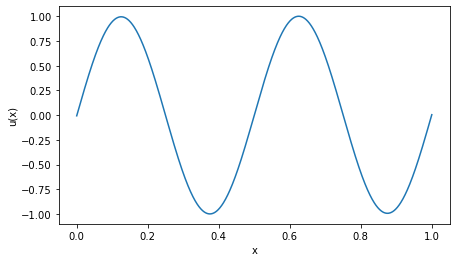

In [9]:
plot_poisson_model(model.network, 0, 1)

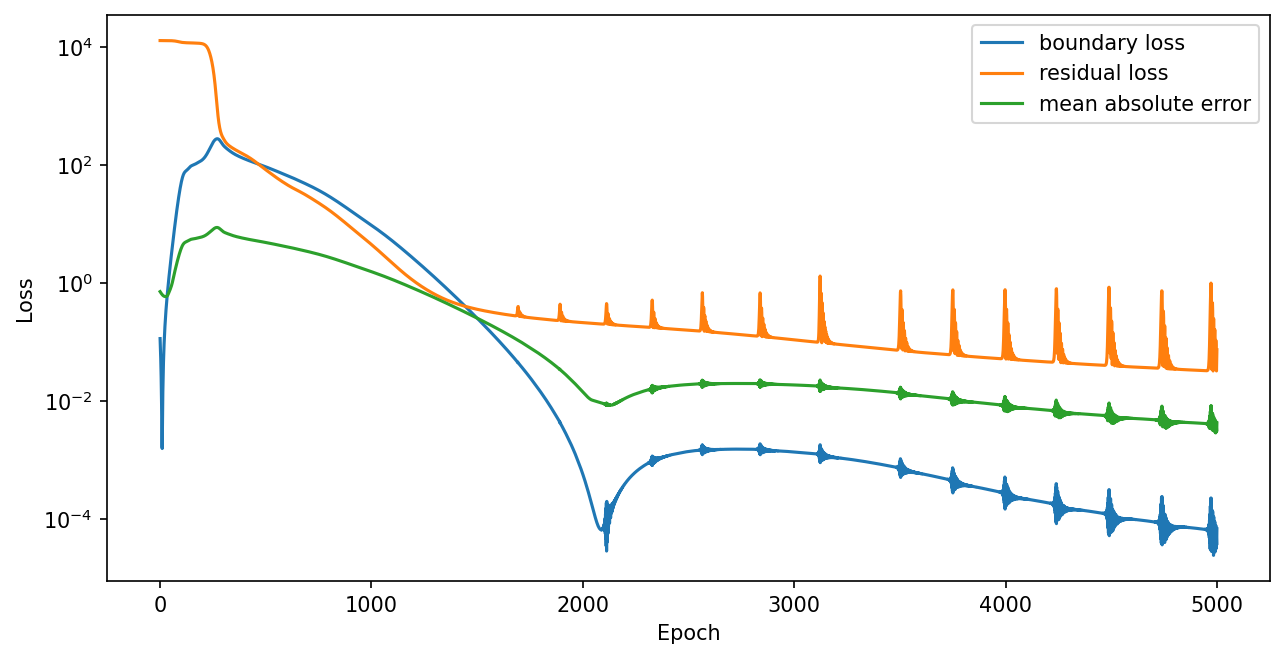

In [10]:
plot_training_loss(history, y_scale = "log")

In [11]:
(x_test, _), (_, _) = simulate_poisson(100, u_xx, u, random_seed=10)

In [12]:
u_test = u(x_test)

In [13]:
u_pred = model.network.predict(x_test)

In [14]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanRelativeError

In [15]:
mae = MeanAbsoluteError()
mre = MeanRelativeError(normalizer = u_test)

In [16]:
mae(u_test, u_pred), mre(u_test, u_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0026997668>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0025226492>)